In [826]:
import requests, json
import pandas as pd
import numpy as np
import seaborn
from bs4 import BeautifulSoup
%matplotlib inline

In [827]:
#URLShanghai    = 'https://www.topuniversities.com/university-rankings/world-university-rankings/2018'
baseURLShanghai = 'https://www.topuniversities.com/'
URLShanghai     = baseURLShanghai + 'sites/default/files/qs-rankings-data/357051.txt?_=1508356628355'

#URLTimes       = 'https://www.timeshighereducation.com/world-university-rankings/2018/world-ranking
baseURLTimes    = 'https://www.timeshighereducation.com/'
URLTimes        = baseURLTimes + 'sites/default/files/the_data_rankings/world_university_rankings_2018_limit0_369a9045a203e176392b9fb8f8c1cb2a.json'

In [828]:
r = requests.get(URLShanghai)

#soup = BeautifulSoup(page_body, 'html.parser')

universities_list = list()
universitiesJson = (list(r.json().values())[0])
for uni in universitiesJson[0:200]:
    title   = uni['title']  
    rank    = int(uni['rank_display'].replace('=', ''))
    country = uni['country']
    region  = uni['region']
    link    = uni['url']
    r_uni   = requests.get(baseURLShanghai+link).text
    soup = BeautifulSoup(r_uni, 'html.parser')
    try:
        nbfaculty_all = int([p.find('div', class_='number').text[1:7] for p in soup.find_all('div', class_='total faculty')][0].replace(',', ''))
        nbfaculty_int = int([p.find('div', class_='number').text[1:7] for p in soup.find_all('div', class_='inter faculty')][0].replace(',', ''))
        nbstudents_all = int([p.find('div', class_='number').text[1:8] for p in soup.find_all('div', class_='total student')][0].replace(',', ''))
        nbstudents_int = int([p.find('div', class_='number').text[1:7] for p in soup.find_all('div', class_='total inter')][0].replace(',', ''))
    except:
        nbfaculty_all,nbfaculty_int,nbstudents_all,nbstudents_int = 0,0,0,0
    universities_list.append({'title': title,'rank': rank,'country': country, 'region':region
                             ,'nbfaculty_all':nbfaculty_all,'nbfaculty_int':nbfaculty_int,
                             'nbstudents_all':nbstudents_all,'nbstudents_int':nbstudents_int})  

universities = pd.DataFrame.from_dict(universities_list)
universities.set_index('rank')

,country,nbfaculty_all,nbfaculty_int,nbstudents_all,nbstudents_int,region,title
rank,,,,,,,
1,United States,2982,1679,11067,3717,North America,Massachusetts Institute of Technology (MIT)
2,United States,4285,2042,15878,3611,North America,Stanford University
3,United States,4350,1311,22429,5266,North America,Harvard University
4,United States,953,350,2255,647,North America,California Institute of Technology (Caltech)
5,United Kingdom,5490,2278,18770,6699,Europe,University of Cambridge
6,United Kingdom,6750,2964,19720,7353,Europe,University of Oxford
7,United Kingdom,6345,2554,31080,14854,Europe,UCL (University College London)
8,United Kingdom,3930,2071,16090,8746,Europe,Imperial College London
9,United States,2449,635,13557,3379,North America,University of Chicago


In [829]:
universities['ratioFacultymemStudentmem'] = universities.apply(lambda row: row.nbfaculty_all*100 / row.nbstudents_all if  row['nbstudents_all'] > 0 else 0 , axis=1)
problema1 = universities.sort_values(['ratioFacultymemStudentmem'], ascending=False)
with pd.option_context('display.max_rows', None, 'display.max_columns', 3):
    print(problema1.title[0:10], problema1.ratioFacultymemStudentmem[0:10])

3      California Institute of Technology (Caltech)
15                                  Yale University
5                              University of Oxford
4                           University of Cambridge
16                         Johns Hopkins University
1                               Stanford University
0       Massachusetts Institute of Technology (MIT)
185                         University of Rochester
18                       University of Pennsylvania
17                              Columbia University
Name: title, dtype: object 3      42.261641
15     39.832285
5      34.229209
4      29.248801
16     27.635328
1      26.987026
0      26.944972
185    26.660440
18     26.643733
17     24.711519
Name: ratioFacultymemStudentmem, dtype: float64


In [830]:
universities['ratioIntStudentmem'] = universities.apply(lambda row: row.nbstudents_int* 100 / row.nbstudents_all  if  row['nbstudents_all'] > 0 else 0 , axis=1)
problema2 = universities.sort_values(['ratioIntStudentmem'], ascending=False)
with pd.option_context('display.max_rows', None, 'display.max_columns', 3):
    print(problema2.title[0:10], problema2.ratioIntStudentmem[0:10])

34     London School of Economics and Political Scien...
11       Ecole Polytechnique Fédérale de Lausanne (EPFL)
7                                Imperial College London
198                                Maastricht University
47                            Carnegie Mellon University
6                        UCL (University College London)
91                              University of St Andrews
41                           The University of Melbourne
126                      Queen Mary University of London
25                           The University of Hong Kong
Name: title, dtype: object 34     69.139344
11     57.004738
7      54.356743
198    50.253280
47     47.806229
6      47.792793
91     45.795455
41     42.743350
126    42.181593
25     40.714356
Name: ratioIntStudentmem, dtype: float64


In [831]:

country_agg = universities[0:200].groupby(['country'], as_index=False).mean().groupby('country')['ratioIntStudentmem'].max()
country_agg.sort_values()


country
India              0.686366
Brazil             3.404956
Chile              4.581583
Mexico             6.043580
Israel             6.254915
Japan              8.999984
Taiwan             9.168028
South Korea       10.245306
Finland           10.288970
China             10.756050
Norway            11.137878
Italy             12.041782
Spain             12.196665
Belgium           16.010754
Saudi Arabia      16.374172
Denmark           16.480908
Germany           16.530000
Sweden            16.799823
Russia            16.862369
South Africa      16.970347
United States     19.065774
Malaysia          19.416825
France            21.328561
Argentina         22.165804
Ireland           24.179052
Netherlands       24.545618
New Zealand       24.897050
Canada            25.260365
Singapore         27.709068
Austria           30.609509
Hong Kong         31.214764
Switzerland       31.381638
Australia         34.687799
United Kingdom    35.130774
Name: ratioIntStudentmem, dtype: float64

In [832]:

country_fac_agg = universities[0:200].groupby(['country'], as_index=False).mean().groupby('country')['ratioFacultymemStudentmem'].max()
country_fac_agg.sort_values()


country
India              5.183204
Austria            5.729837
New Zealand        6.868701
Chile              7.088345
Australia          7.640655
Brazil             7.950532
Taiwan             8.031079
Ireland            8.217952
Spain              8.520872
South Africa       8.844996
Belgium            9.213082
Germany            9.854237
Italy             10.024703
Canada            10.329813
Sweden            10.425459
Netherlands       10.531125
Finland           11.073131
China             11.631789
Mexico            12.120381
Norway            12.251009
Hong Kong         12.898782
Argentina         13.426710
Switzerland       13.487205
United Kingdom    13.591347
Israel            13.604743
France            14.400567
United States     14.793528
South Korea       14.935617
Malaysia          15.389342
Japan             15.583953
Singapore         16.227888
Saudi Arabia      17.582781
Denmark           18.658043
Russia            22.190983
Name: ratioFacultymemStudentmem, dtype: 

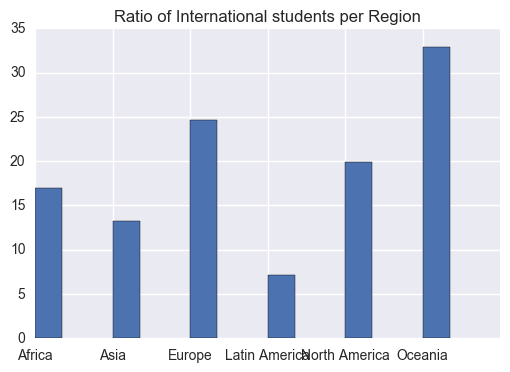

In [833]:
import matplotlib.pyplot as plt
region_agg = universities[0:200].groupby(['region'], as_index=False).mean().groupby('region')['ratioIntStudentmem'].max()
region_agg.sort_values()


plt.bar(range(0,len(region_agg)), region_agg,0.35)
plt.xticks(index, region_agg.keys().tolist())
plt.title('Ratio of International students per Region')


plt.show()

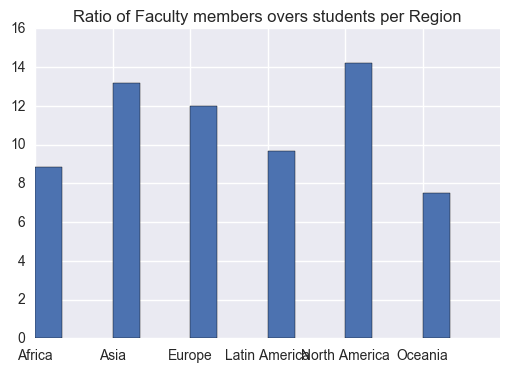

In [834]:

region_fac_agg = universities[0:200].groupby(['region'], as_index=False).mean().groupby('region')['ratioFacultymemStudentmem'].max()
region_fac_agg.sort_values()
plt.bar(range(0,len(region_fac_agg)), region_fac_agg,0.35)
plt.xticks(index, region_fac_agg.keys().tolist())
plt.title('Ratio of Faculty members overs students per Region')
plt.show()

# Exercice 2

In [836]:
countryURL = 'https://restcountries.eu/rest/v2/name/'


r2 = requests.get(URLTimes)

#soup = BeautifulSoup(page_body, 'html.parser')

universitiesTimes_list = list()
universitiesTimesJson = r2.json().get('data')
for uni in universitiesTimesJson[0:200]:
    #print(uni)
    title                      = uni['name']
    rank                       = int(uni['rank'].replace('=',''))
    country                    = uni['location']
    link                       = uni['url']
    nbstudents_all             = int(uni['stats_number_students'].replace(',',''))
    ratioIntStudentmem         = int(uni['stats_pc_intl_students'].replace('%',''))
    nbstudents_int             = int(ratioIntStudentmem /  100 * nbstudents_all)
    nbfaculty_all              = int(nbstudents_all/ float(uni['stats_student_staff_ratio']))
    ratioFacultymemStudentmem  = nbfaculty_all*100 / nbstudents_all
    if('Korea' in country):
        responseRestServ = requests.get(countryURL+'Korea').json()[0]
    else:
        responseRestServ = requests.get(countryURL+country.replace(' ','%20')).json()[0]
    region           = responseRestServ.get('region')
    if (region == 'Americas'):
        region = responseRestServ.get('subregion')
    
    universitiesTimes_list.append({'title': title,'rank': rank,'country': country, 'region':region
                             ,'nbfaculty_all':nbfaculty_all,'ratioIntStudentmem':ratioIntStudentmem,
                             'nbstudents_all':nbstudents_all,'nbstudents_int':nbstudents_int,
                                  'ratioFacultymemStudentmem':ratioFacultymemStudentmem})  

universitiesTimes = pd.DataFrame.from_dict(universitiesTimes_list)
universitiesTimes.set_index('rank')

,country,nbfaculty_all,nbstudents_all,nbstudents_int,ratioFacultymemStudentmem,ratioIntStudentmem,region,title
rank,,,,,,,,
1,United Kingdom,1822,20409,7755,8.927434,38,Europe,University of Oxford
2,United Kingdom,1687,18389,6436,9.173963,35,Europe,University of Cambridge
3,United States,339,2209,596,15.346311,27,Northern America,California Institute of Technology
3,United States,2112,15845,3485,13.329126,22,Northern America,Stanford University
5,United States,1284,11177,3800,11.487877,34,Northern America,Massachusetts Institute of Technology
6,United States,2283,20326,5284,11.231920,26,Northern America,Harvard University
7,United States,958,7955,1909,12.042740,24,Northern America,Princeton University
8,United Kingdom,1390,15857,8721,8.765845,55,Europe,Imperial College London
9,United States,2181,13525,3381,16.125693,25,Northern America,University of Chicago


In [837]:
#universitiesTimes['region']= universities['region'].map(lambda x: x.replace('Northern America','North America'))
#universitiesTimes['region']= universities['region'].map(lambda x: x.replace('South America','Latin America'))



universitiesTimes.head()


,country,nbfaculty_all,nbstudents_all,nbstudents_int,rank,ratioFacultymemStudentmem,ratioIntStudentmem,region,title
0,United Kingdom,1822,20409,7755,1,8.927434,38,Europe,University of Oxford
1,United Kingdom,1687,18389,6436,2,9.173963,35,Europe,University of Cambridge
2,United States,339,2209,596,3,15.346311,27,Northern America,California Institute of Technology
3,United States,2112,15845,3485,3,13.329126,22,Northern America,Stanford University
4,United States,1284,11177,3800,5,11.487877,34,Northern America,Massachusetts Institute of Technology


In [838]:
problema1Times = universitiesTimes.sort_values(['ratioFacultymemStudentmem'], ascending=False)
with pd.option_context('display.max_rows', None, 'display.max_columns', 3):
    print(problema1Times.title[0:10], problema1Times.ratioFacultymemStudentmem[0:10]*100)

105               Vanderbilt University
109            University of Copenhagen
12             Johns Hopkins University
11                      Yale University
153             University of Rochester
97                     Emory University
16                      Duke University
114                 École Polytechnique
183    Scuola Normale Superiore di Pisa
185                 University of Miami
Name: title, dtype: object 105    3029.722754
109    2438.887975
12     2325.461350
11     2324.969148
153    2324.616023
97     2272.116373
16     2222.076560
114    1957.842086
183    1922.330097
185    1694.829760
Name: ratioFacultymemStudentmem, dtype: float64


In [839]:
problema2Times = universitiesTimes.sort_values(['ratioIntStudentmem'], ascending=False)
with pd.option_context('display.max_rows', None, 'display.max_columns', 3):
    print(problema2Times.title[0:10], problema2Times.ratioIntStudentmem[0:10])

24     London School of Economics and Political Science
178                            University of Luxembourg
37             École Polytechnique Fédérale de Lausanne
7                               Imperial College London
102                               Maastricht University
15                            University College London
143                            University of St Andrews
23                           Carnegie Mellon University
120                     Queen Mary University of London
39                              University of Hong Kong
Name: title, dtype: object 24     71
178    57
37     55
7      55
102    50
15     49
143    48
23     45
120    45
39     42
Name: ratioIntStudentmem, dtype: int64


In [840]:

country_aggTimes = universitiesTimes[0:200].groupby(['country'], as_index=False).mean().groupby('country')['ratioIntStudentmem'].max()
country_aggTimes.sort_values()

country
Taiwan                 8.000000
China                  8.571429
Japan                  9.000000
South Korea            9.000000
Italy                 10.500000
Finland               13.000000
Spain                 14.000000
Sweden                14.000000
Germany               15.200000
Denmark               16.666667
South Africa          18.000000
United States         18.177419
Norway                19.000000
Netherlands           19.230769
Belgium               19.750000
France                20.833333
Russian Federation    22.000000
Canada                22.500000
Austria               26.000000
Ireland               27.000000
New Zealand           29.000000
Singapore             30.500000
Australia             30.750000
Switzerland           31.428571
Hong Kong             32.800000
United Kingdom        36.548387
Luxembourg            57.000000
Name: ratioIntStudentmem, dtype: float64

In [841]:
country_fac_aggTimes = universitiesTimes[0:200].groupby(['country'], as_index=False).mean().groupby('country')['ratioFacultymemStudentmem'].max()
country_fac_aggTimes.sort_values()

country
Belgium                2.605623
Germany                2.793678
Australia              3.821934
Ireland                4.382002
Austria                4.805654
Canada                 5.271169
New Zealand            5.318308
Norway                 5.373242
Finland                5.556253
Netherlands            5.647077
Hong Kong              5.660563
Singapore              6.007771
Spain                  6.278411
Luxembourg             6.842423
Sweden                 7.245145
United Kingdom         7.422545
South Korea            8.011463
Switzerland            8.342189
South Africa           8.543923
Taiwan                 8.693872
China                  8.741131
France                 9.927243
United States         10.635612
Japan                 13.208614
Russian Federation    13.695444
Italy                 13.814549
Denmark               16.012353
Name: ratioFacultymemStudentmem, dtype: float64

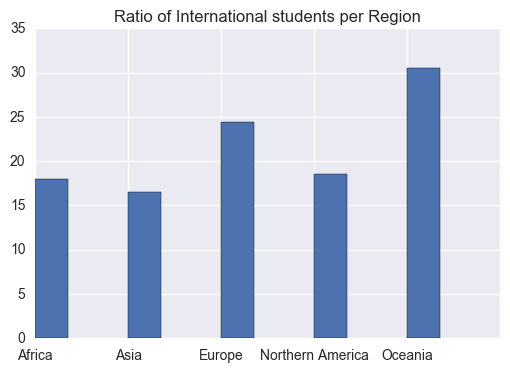

In [842]:
region_aggTimes = universitiesTimes[0:200].groupby(['region'], as_index=False).mean().groupby('region')['ratioIntStudentmem'].max()
region_aggTimes.sort_values()


plt.bar(range(0,len(region_aggTimes)), region_aggTimes,0.35)
plt.xticks(index, region_aggTimes.keys().tolist())
plt.title('Ratio of International students per Region')


plt.show()

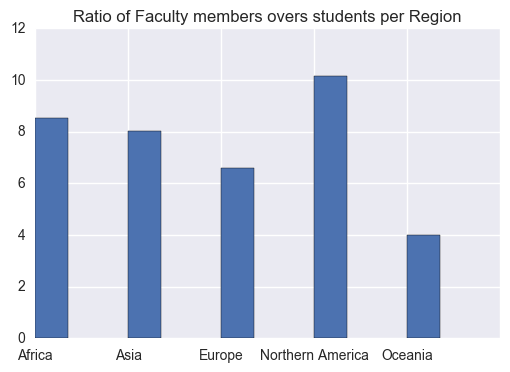

In [843]:

region_fac_aggTimes = universitiesTimes[0:200].groupby(['region'], as_index=False).mean().groupby('region')['ratioFacultymemStudentmem'].max()
region_fac_aggTimes.sort_values()
plt.bar(range(0,len(region_fac_aggTimes)), region_fac_aggTimes,0.35)
plt.xticks(index, region_fac_aggTimes.keys().tolist())
plt.title('Ratio of Faculty members overs students per Region')
plt.show()

# Exercice 3

In [844]:
matches = [uni for uni in list(universitiesTimes['title']) if uni in list(universities['title'])]
len(list(universitiesTimes['title']))

200

In [845]:
from difflib import SequenceMatcher
def similar(a, b):
    return SequenceMatcher(None, a, b).ratio()


CORRELATION_THRESHOLD = 0.67
shanghaiTimesDict = dict()
ShanghaiTitles = list(universities['title'])
TimesTitles     = list(universitiesTimes['title'])
for s in ShanghaiTitles:
    matchingValue=0
    uniMatch = ''
    for idx,i in enumerate(TimesTitles):
        forbidden = ['Universi','of','Institute','Technology','College','The',
                     'Scuola','Ecole','normal','Normal','Superiore',' ']
        s1,s2= s,i
        for el in forbidden:
            s1 = s1.replace(el,'')
            s2 = s2.replace(el,'') 
        #print(s1,' vs ', s2)
        # Find the best match, if correlation values is smaller than CORRELATION_THRESHOLD, 
        # it's probably the wrong match
        correlation = similar(s1,s2)
        if (correlation == 1):
            matchingValue= correlation
            index_to_remove = idx
            uniMatch=i
            break
        if (matchingValue < correlation  > CORRELATION_THRESHOLD ):
            matchingValue= correlation
            index_to_remove = idx
            uniMatch=i
    # If an acceptable match was found, we add it to the dictionary
    if (matchingValue > CORRELATION_THRESHOLD):
        shanghaiTimesDict[s] = uniMatch
        del TimesTitles[index_to_remove]

# That was the only one we couldn't match ^^
shanghaiTimesDict['University of Bern'] = shanghaiTimesDict.pop('University of Bergen')

In [846]:
print('We found', len(shanghaiTimesDict), 'Amongst' ,len(universities), 'matches between the two datasets.')

We found 154 Amongst 200 matches between the two datasets.


In [847]:
validUnis = set(list(shanghaiTimesDict.values())+list(shanghaiTimesDict.keys()))

toNOTMergeTimesUniversities = list(universities[~universities['title'].isin(validUnis)]['title'])
toNOTMergeShanghaiUniversities = list(universitiesTimes[~universitiesTimes['title'].isin(validUnis)]['title'])
toNOTMerge = toNOTMergeTimesUniversities + toNOTMergeShanghaiUniversities

In [848]:
merged_df = pd.merge(universities, universitiesTimes, on='title', how='outer', suffixes=('_universitiesShanghai', '_universitiesTimes'))
# Remove universities that are not in both rankings
for el in toNOTMerge:
    merged_df = merged_df[merged_df.title != el]

# Replace title by their corresponging match on the other dataset
for uni in merged_df['title']:
    if uni  not in shanghaiTimesDict.values():
        k += 1
        merged_df.loc[(merged_df.title == uni),'title' ] = shanghaiTimesDict.get(uni)

In [849]:
merged_df.head()

,country_universitiesShanghai,nbfaculty_all_universitiesShanghai,nbfaculty_int,nbstudents_all_universitiesShanghai,nbstudents_int_universitiesShanghai,rank_universitiesShanghai,region_universitiesShanghai,title,ratioFacultymemStudentmem_universitiesShanghai,ratioIntStudentmem_universitiesShanghai,country_universitiesTimes,nbfaculty_all_universitiesTimes,nbstudents_all_universitiesTimes,nbstudents_int_universitiesTimes,rank_universitiesTimes,ratioFacultymemStudentmem_universitiesTimes,ratioIntStudentmem_universitiesTimes,region_universitiesTimes
0,United States,2982.0,1679.0,11067.0,3717.0,1.0,North America,Massachusetts Institute of Technology,26.944972,33.586338,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
1,United States,4285.0,2042.0,15878.0,3611.0,2.0,North America,Stanford University,26.987026,22.742159,United States,2112.0,15845.0,3485.0,3.0,13.329126,22.0,Northern America
2,United States,4350.0,1311.0,22429.0,5266.0,3.0,North America,Harvard University,19.394534,23.478532,United States,2283.0,20326.0,5284.0,6.0,11.231920,26.0,Northern America
3,United States,953.0,350.0,2255.0,647.0,4.0,North America,California Institute of Technology,42.261641,28.691796,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
4,United Kingdom,5490.0,2278.0,18770.0,6699.0,5.0,Europe,University of Cambridge,29.248801,35.689931,United Kingdom,1687.0,18389.0,6436.0,2.0,9.173963,35.0,Europe


In [850]:
print('3',merged_df[merged_df['title'].str.contains("Lausanne")]['title'])


3 11     École Polytechnique Fédérale de Lausanne
145                      University of Lausanne
214    École Polytechnique Fédérale de Lausanne
Name: title, dtype: object


In [851]:
#set(merged_df[pd.isnull(merged_df).any(axis=1)]['title'])
merged_df = merged_df.groupby(['title']).first().reset_index()
merged_df[153:154]

,title,country_universitiesShanghai,nbfaculty_all_universitiesShanghai,nbfaculty_int,nbstudents_all_universitiesShanghai,nbstudents_int_universitiesShanghai,rank_universitiesShanghai,region_universitiesShanghai,ratioFacultymemStudentmem_universitiesShanghai,ratioIntStudentmem_universitiesShanghai,country_universitiesTimes,nbfaculty_all_universitiesTimes,nbstudents_all_universitiesTimes,nbstudents_int_universitiesTimes,rank_universitiesTimes,ratioFacultymemStudentmem_universitiesTimes,ratioIntStudentmem_universitiesTimes,region_universitiesTimes
153,École Polytechnique Fédérale de Lausanne,Switzerland,1695.0,1300.0,10343.0,5896.0,12.0,Europe,16.387895,57.004738,Switzerland,886.0,9928.0,5460.0,38.0,8.924255,55.0,Europe
